In [2]:
# prompt: From the above data split the data into train and test and train SVM, RF find the result?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in a pandas DataFrame called 'df'
# and you have a column named 'target' representing the labels

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/dermatology_database_1.csv')


# Separate features (X) and target (y)
# Replace 'target_column' with the actual name of your target column



# Example data (replace with your actual data)
X = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 2], [6, 4]]
y = [0, 0, 0, 1, 1, 1]

X = pd.DataFrame(X, columns=['feature1','feature2'])
y = pd.Series(y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train an SVM classifier
svm_classifier = SVC(kernel='linear') # You can try different kernels
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Adjust n_estimators as needed
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)


# Evaluate the models
print("SVM Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

SVM Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Random Forest Classifier:
Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Q1 Results:
SVM Accuracy: 0.6805555555555556
Random Forest Accuracy: 0.9861111111111112

Q2 Results (After Outlier Removal):
SVM Accuracy: 0.6764705882352942
Random Forest Accuracy: 0.9852941176470589


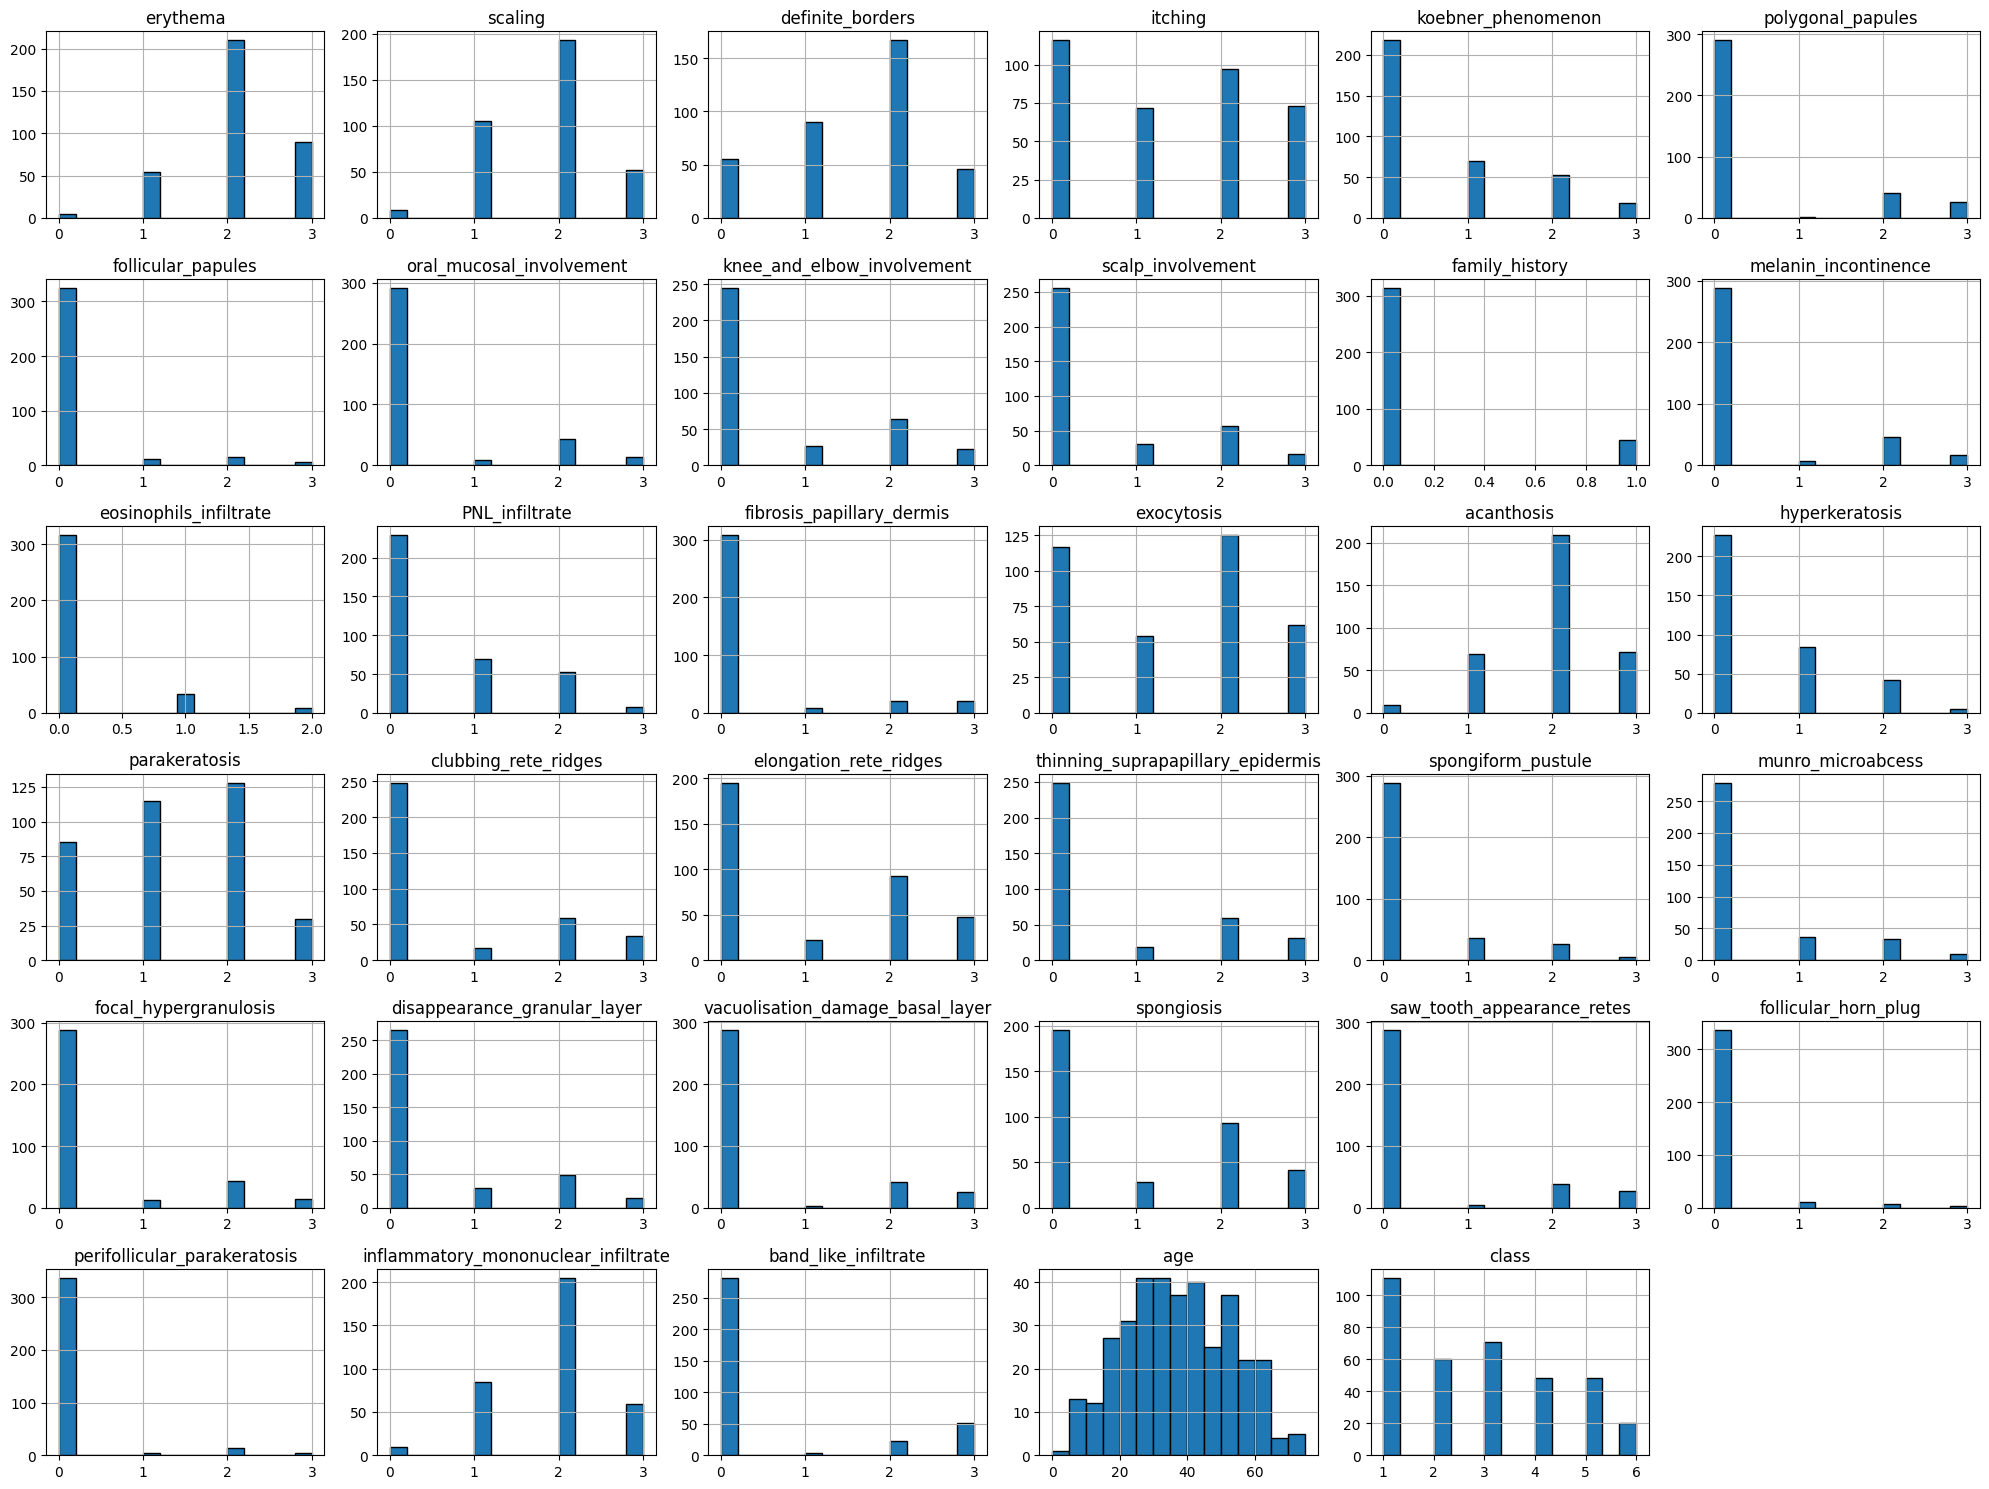

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/dermatology_database_1.csv"
df = pd.read_csv('/content/dermatology_database_1.csv')

# Preprocessing: Convert the 'age' column to numeric and handle invalid values
# Changed 'data' to 'df' in the following lines
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with missing or invalid age values
df = df.dropna(subset=['age'])

# Separate features and target
# Changed 'data' to 'df' in the following lines
X = df.drop(columns=['class'])
y = df['class']

# Q1: Train/Test split and model training (SVM, RF)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Q1 Results:")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Q2: Detect and remove outliers, then retrain models
isolation_forest = IsolationForest(random_state=42, contamination=0.05)
outliers = isolation_forest.fit_predict(X)

# Keep only the non-outlier data
X_clean = X[outliers == 1]
y_clean = y[outliers == 1]

# Split cleaned data into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# Retrain SVM
svm_model_clean = SVC(random_state=42)
svm_model_clean.fit(X_train_clean, y_train_clean)
y_pred_svm_clean = svm_model_clean.predict(X_test_clean)
svm_accuracy_clean = accuracy_score(y_test_clean, y_pred_svm_clean)

# Retrain Random Forest
rf_model_clean = RandomForestClassifier(random_state=42)
rf_model_clean.fit(X_train_clean, y_train_clean)
y_pred_rf_clean = rf_model_clean.predict(X_test_clean)
rf_accuracy_clean = accuracy_score(y_test_clean, y_pred_rf_clean)

print("\nQ2 Results (After Outlier Removal):")
print(f"SVM Accuracy: {svm_accuracy_clean}")
print(f"Random Forest Accuracy: {rf_accuracy_clean}")

# Q3: Plot histograms for each column
# Changed 'data' to 'df' in the following line
df.hist(bins=15, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.show()